# **Текстовое задание для кандидата**

### **Описание задачи и датасета:**

У вас есть датасет, содержащий историю оказания медицинских услуг клиентам. Каждый клиент имеет несколько сессий, и каждая сессия представляет собой последовательность медицинских услуг, предоставленных клиенту в определенный период.

### **Описание полей:**

- **`user_id`**: Уникальный идентификатор клиента (пациента).
- **`session_id`**: Уникальный идентификатор сессии (лечения) клиента.
- **`date_service`**: Дата оказания услуги.
- **`session_start_date`**: Дата начала сессии.
- **`session_end_date`**: Дата окончания сессии.
- **`session_length`**: Длительность сессии в днях.
- **`session_status`**: Статус сессии.
- **`segment`**: Сегмент клиента.
- **`channel`**: Канал оказания услуги.
- **`subchannel`**: Субканал оказания услуги.
- **`service_category`**: Категория услуги.
- **`doctor_speciality`**: Специальность врача.
- **`doctor_specialization`**: Специализация врача.
- **`physiotherapy_type`**: Тип физиотерапии.
- **`diagnostics_type`**: Тип инструментальной диагностики.
- **`laboratory_type`**: Тип лабораторной диагностики.
- **`consultation_type`**: Тип консультации.
- **`hospital_id`**: Идентификатор больницы.
- **`service_rownum`**: Порядковый номер услуги в рамках сессии.
- **`quantity_service`**: Количество услуг в сессии.
- **`sum_rub_service`**: Сумма оплаты за оказанные услуги в сессии.

### Задание

Вам предстоит выполнить следующие задачи:

1. Провести исследование данных (EDA) в различных разрезах для выявления закономерностей и взаимосвязей.
2. Определить, какие медицинские услуги, их последовательности, а также другие факторы могут оказать влияние на увеличение средней суммы оплаты за сессию и среднего количества услуг в сессии.
3. Разработать модель, способную анализировать последовательность медицинских услуг в сессии и прогнозировать среднюю сумму оплаты за сессию.

Пожалуйста, предоставьте отчет по вашим исследованиям, включая анализ данных, обоснование выбора методов моделирования и описание процесса разработки модели. Важно обосновать и интерпретировать результаты вашего исследования. Помните о качестве кода, комментариях и четком оформлении отчета. Ваша работа должна быть понятной и легко воспроизводимой.

### 1 EDA

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

,user_id,session_id,date_service,session_start_date,session_end_date,session_length,session_status,segment,channel,subchannel,...,doctor_specialization,doctor_speciality,physiotherapy_type,diagnostics_type,laboratory_type,consultation_type,hospital_id,service_rownum,quantity_service,sum_rub_service
0,100134420,100134420.2.1,2022-10-14,2022-10-13,2022-10-25,13,Completed,Не КМ,Очно,Лаборатория,...,NaN,NaN,NaN,NaN,Лаб. усл. - биохим.,NaN,35002198,5,1,220
1,100134420,100134420.2.1,2022-10-14,2022-10-13,2022-10-25,13,Completed,Не КМ,Очно,Лаборатория,...,NaN,NaN,NaN,NaN,Лаб. усл. - биохим.,NaN,35002198,6,1,244
2,100134420,100134420.2.1,2022-10-14,2022-10-13,2022-10-25,13,Completed,Не КМ,Очно,Лаборатория,...,NaN,NaN,NaN,NaN,Лаб. усл. - биохим.,NaN,35002198,7,1,216
3,100134420,100134420.2.1,2022-10-14,2022-10-13,2022-10-25,13,Completed,Не КМ,Очно,Лаборатория,...,NaN,NaN,NaN,NaN,Лаб. усл. - биохим.,NaN,35002198,8,1,454
4,100134420,100134420.2.1,2022-10-14,2022-10-13,2022-10-25,13,Completed,Не КМ,Очно,Лаборатория,...,NaN,NaN,NaN,NaN,Лаб. усл. - биохим.,NaN,35002198,9,1,229


<class 'pandas.core.frame.DataFrame'>
Int64Index: 999992 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   user_id                999992 non-null  int64 
 1   session_id             999992 non-null  object
 2   date_service           999992 non-null  object
 3   session_start_date     999992 non-null  object
 4   session_end_date       999992 non-null  object
 5   session_length         999992 non-null  int64 
 6   session_status         999992 non-null  object
 7   segment                999992 non-null  object
 8   channel                999992 non-null  object
 9   subchannel             998097 non-null  object
 10  service_category       776154 non-null  object
 11  doctor_specialization  262912 non-null  object
 12  doctor_speciality      276145 non-null  object
 13  physiotherapy_type     95930 non-null   object
 14  diagnostics_type       106657 non-null  object
 15  

None

,user_id,session_length,hospital_id,service_rownum,quantity_service,sum_rub_service
count,9.999920e+05,999992.000000,9.999920e+05,999992.000000,999992.000000,999992.000000
mean,1.347656e+08,23.208231,9.973618e+07,21.879792,1.272911,1126.386955
std,2.550735e+07,17.924080,5.387747e+07,52.754013,15.458829,2385.947934
min,1.015500e+04,1.000000,5.000000e+00,1.000000,0.000000,0.000000
25%,1.379083e+08,8.000000,4.500634e+07,4.000000,1.000000,290.000000
50%,1.404217e+08,19.000000,1.362836e+08,10.000000,1.000000,704.000000
75%,1.413928e+08,35.000000,1.411940e+08,22.000000,1.000000,1390.000000
max,1.421728e+08,119.000000,1.524247e+08,1566.000000,10785.000000,446687.000000


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'session_length'}>],
       [<AxesSubplot:title={'center':'hospital_id'}>,
        <AxesSubplot:title={'center':'service_rownum'}>],
       [<AxesSubplot:title={'center':'quantity_service'}>,
        <AxesSubplot:title={'center':'sum_rub_service'}>]], dtype=object)

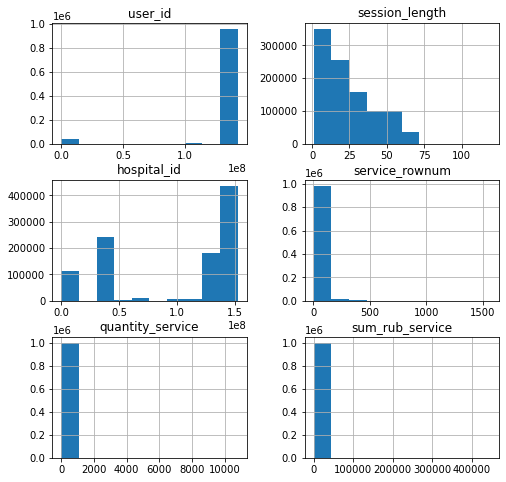

In [17]:
#чтение данных и первичный просмотр их
def func_info(data):
    display(data.head())
    display(data.info())
    display(data.describe())
    display(data.hist(figsize=(8,8)))

data = pd.read_pickle(r'C:/Users/panao/Downloads/test_data.pickle')
func_info(data)

In [18]:
data_mark = data.copy()

In [19]:
#Кол-во пропусков в штуках
data.isnull().sum()

user_id                       0
session_id                    0
date_service                  0
session_start_date            0
session_end_date              0
session_length                0
session_status                0
segment                       0
channel                       0
subchannel                 1895
service_category         223838
doctor_specialization    737080
doctor_speciality        723847
physiotherapy_type       904062
diagnostics_type         893335
laboratory_type          705798
consultation_type        767276
hospital_id                   0
service_rownum                0
quantity_service              0
sum_rub_service               0
dtype: int64

In [20]:
#Кол-во пропусков в процентах
data.isnull().sum()/999992 * 100

user_id                   0.000000
session_id                0.000000
date_service              0.000000
session_start_date        0.000000
session_end_date          0.000000
session_length            0.000000
session_status            0.000000
segment                   0.000000
channel                   0.000000
subchannel                0.189502
service_category         22.383979
doctor_specialization    73.708590
doctor_speciality        72.385279
physiotherapy_type       90.406923
diagnostics_type         89.334215
laboratory_type          70.580365
consultation_type        76.728214
hospital_id               0.000000
service_rownum            0.000000
quantity_service          0.000000
sum_rub_service           0.000000
dtype: float64

Очень много пропусков в категориальных данных, их необходимо заполнить

In [21]:
# заполнить пропущенные значения с помощью метода k – ближайщих соседей
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# создание экземпляра класса KNNImputer
imputer = KNNImputer(n_neighbors=2)

# создание экземпляра класса LabelEncoder для кодирования текстовых данных
le = LabelEncoder()

# кодирование текстовых данных в столбцах 'col1' и 'col2'
data['subchannel'] = le.fit_transform(data['subchannel'].astype(str))
data['doctor_specialization'] = le.fit_transform(data['doctor_specialization'].astype(str))
data['doctor_speciality'] = le.fit_transform(data['doctor_speciality'].astype(str))
data['physiotherapy_type'] = le.fit_transform(data['physiotherapy_type'].astype(str))
data['diagnostics_type'] = le.fit_transform(data['diagnostics_type'].astype(str))
data['laboratory_type'] = le.fit_transform(data['laboratory_type'].astype(str))
data['consultation_type'] = le.fit_transform(data['consultation_type'].astype(str))
data['service_category'] = le.fit_transform(data['service_category'].astype(str))

In [22]:
data['session_id'] = le.fit_transform(data['session_id'].astype(str))
data['date_service'] = le.fit_transform(data['date_service'].astype(str))
data['session_start_date'] = le.fit_transform(data['session_start_date'].astype(str))
data['session_end_date'] = le.fit_transform(data['session_end_date'].astype(str))
data['session_status'] = le.fit_transform(data['session_status'].astype(str))
data['segment'] = le.fit_transform(data['segment'].astype(str))
data['channel'] = le.fit_transform(data['channel'].astype(str))
data['service_category'] = le.fit_transform(data['service_category'].astype(str))

Использую продвинутый метод заполнения пропусков с помощью ml, не просто удаляя строки или заполняя их с помощью fillna, так как при такой грубой работе с данными, мы их просто сделаем некорректными, ведь слишком много пропусков.

* Была идея с OHE, но использую LE, тк слишком много категориальных объектов. Из-за быстрого увеличения пространства функций, придется бороться с размерностью с помощью PCA
* Также OHE на этих данных просто не влезла в оперативку ноутбука и была ошибка "Out of memory"

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'session_id'}>,
        <AxesSubplot:title={'center':'date_service'}>,
        <AxesSubplot:title={'center':'session_start_date'}>,
        <AxesSubplot:title={'center':'session_end_date'}>],
       [<AxesSubplot:title={'center':'session_length'}>,
        <AxesSubplot:title={'center':'session_status'}>,
        <AxesSubplot:title={'center':'segment'}>,
        <AxesSubplot:title={'center':'channel'}>,
        <AxesSubplot:title={'center':'subchannel'}>],
       [<AxesSubplot:title={'center':'service_category'}>,
        <AxesSubplot:title={'center':'doctor_specialization'}>,
        <AxesSubplot:title={'center':'doctor_speciality'}>,
        <AxesSubplot:title={'center':'physiotherapy_type'}>,
        <AxesSubplot:title={'center':'diagnostics_type'}>],
       [<AxesSubplot:title={'center':'laboratory_type'}>,
        <AxesSubplot:title={'center':'consultation_type'}>,
        <AxesSubplot:title={'ce

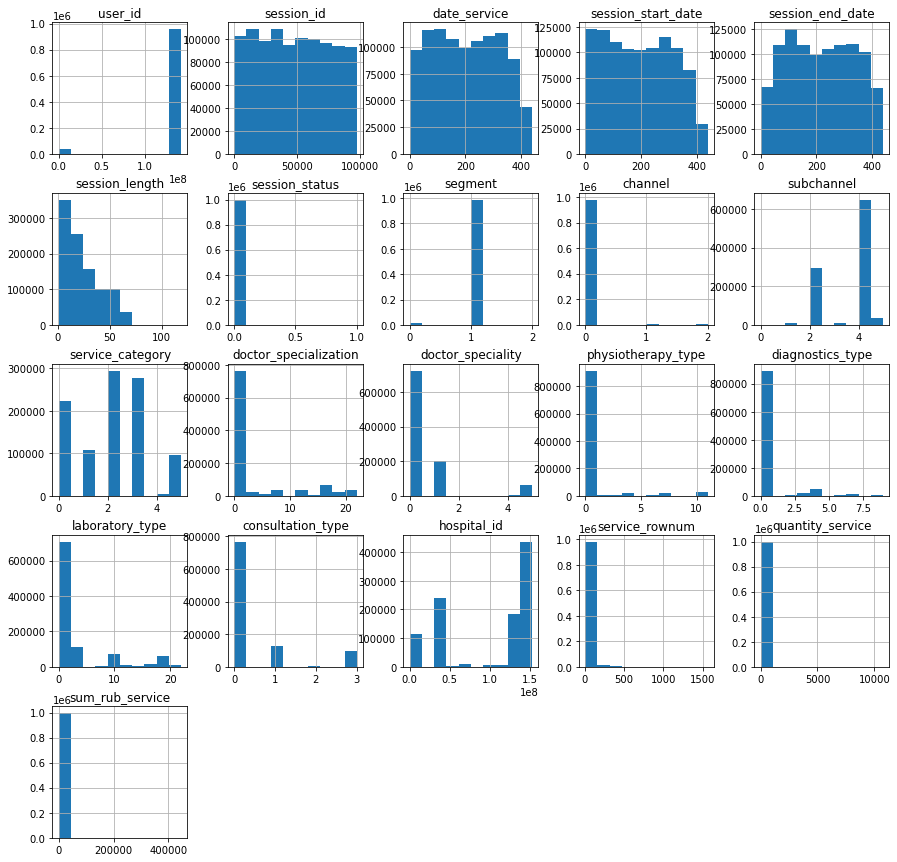

In [23]:
data.hist(figsize=(15,15))

In [24]:
data.isnull().sum()

user_id                  0
session_id               0
date_service             0
session_start_date       0
session_end_date         0
session_length           0
session_status           0
segment                  0
channel                  0
subchannel               0
service_category         0
doctor_specialization    0
doctor_speciality        0
physiotherapy_type       0
diagnostics_type         0
laboratory_type          0
consultation_type        0
hospital_id              0
service_rownum           0
quantity_service         0
sum_rub_service          0
dtype: int64

Корреляционный анализ

In [25]:
data.corr()

,user_id,session_id,date_service,session_start_date,session_end_date,session_length,session_status,segment,channel,subchannel,...,doctor_specialization,doctor_speciality,physiotherapy_type,diagnostics_type,laboratory_type,consultation_type,hospital_id,service_rownum,quantity_service,sum_rub_service
user_id,1.000000,0.349591,-0.028905,-0.029690,-0.028063,0.011111,-0.005166,0.032313,-0.023370,0.004069,...,0.000090,0.002372,-0.001061,-0.000080,0.002852,-0.002394,-0.037293,0.029217,-0.000395,-0.002226
session_id,0.349591,1.000000,-0.009110,-0.008554,-0.010997,-0.015992,-0.000345,0.008346,0.000509,0.016629,...,0.006771,0.016692,0.002575,-0.011520,-0.004084,0.001208,0.077927,-0.007891,0.001465,-0.008917
date_service,-0.028905,-0.009110,1.000000,0.994476,0.993642,-0.018380,0.053189,-0.086563,0.033903,0.014297,...,0.019780,0.021917,0.004274,-0.002551,-0.014274,0.028503,0.011729,0.038559,0.001310,0.011060
session_start_date,-0.029690,-0.008554,0.994476,1.000000,0.988520,-0.088640,0.052771,-0.087196,0.038353,0.004100,...,0.021239,0.026098,-0.015569,-0.000602,-0.006587,0.022145,0.017762,0.008369,0.001760,0.009482
session_end_date,-0.028063,-0.010997,0.993642,0.988520,1.000000,0.062876,0.053870,-0.086129,0.030650,0.009983,...,0.016801,0.016531,0.008578,-0.000584,-0.010207,0.023516,0.002530,0.040449,0.000697,0.009140
session_length,0.011111,-0.015992,-0.018380,-0.088640,0.062876,1.000000,0.006561,0.008165,-0.051280,0.038733,...,-0.029532,-0.063405,0.159390,0.000126,-0.023777,0.008747,-0.100644,0.211376,-0.007026,-0.002380
session_status,-0.005166,-0.000345,0.053189,0.052771,0.053870,0.006561,1.000000,-0.023972,0.014834,-0.009848,...,0.005647,0.011959,-0.002702,-0.000818,0.001937,0.002386,0.022590,-0.005996,-0.000458,-0.000071
segment,0.032313,0.008346,-0.086563,-0.087196,-0.086129,0.008165,-0.023972,1.000000,-0.312199,0.021969,...,-0.004503,-0.021425,0.009289,0.005141,0.012701,0.015174,-0.054930,0.020288,-0.001493,0.009817
channel,-0.023370,0.000509,0.033903,0.038353,0.030650,-0.051280,0.014834,-0.312199,1.000000,-0.148065,...,0.030907,0.124181,-0.039288,-0.044139,-0.073665,-0.034294,0.099085,-0.043051,-0.000604,0.018793
subchannel,0.004069,0.016629,0.014297,0.004100,0.009983,0.038733,-0.009848,0.021969,-0.148065,1.000000,...,0.295123,0.243617,0.170705,0.192500,-0.739223,0.283345,-0.051186,0.104011,0.013374,0.168992


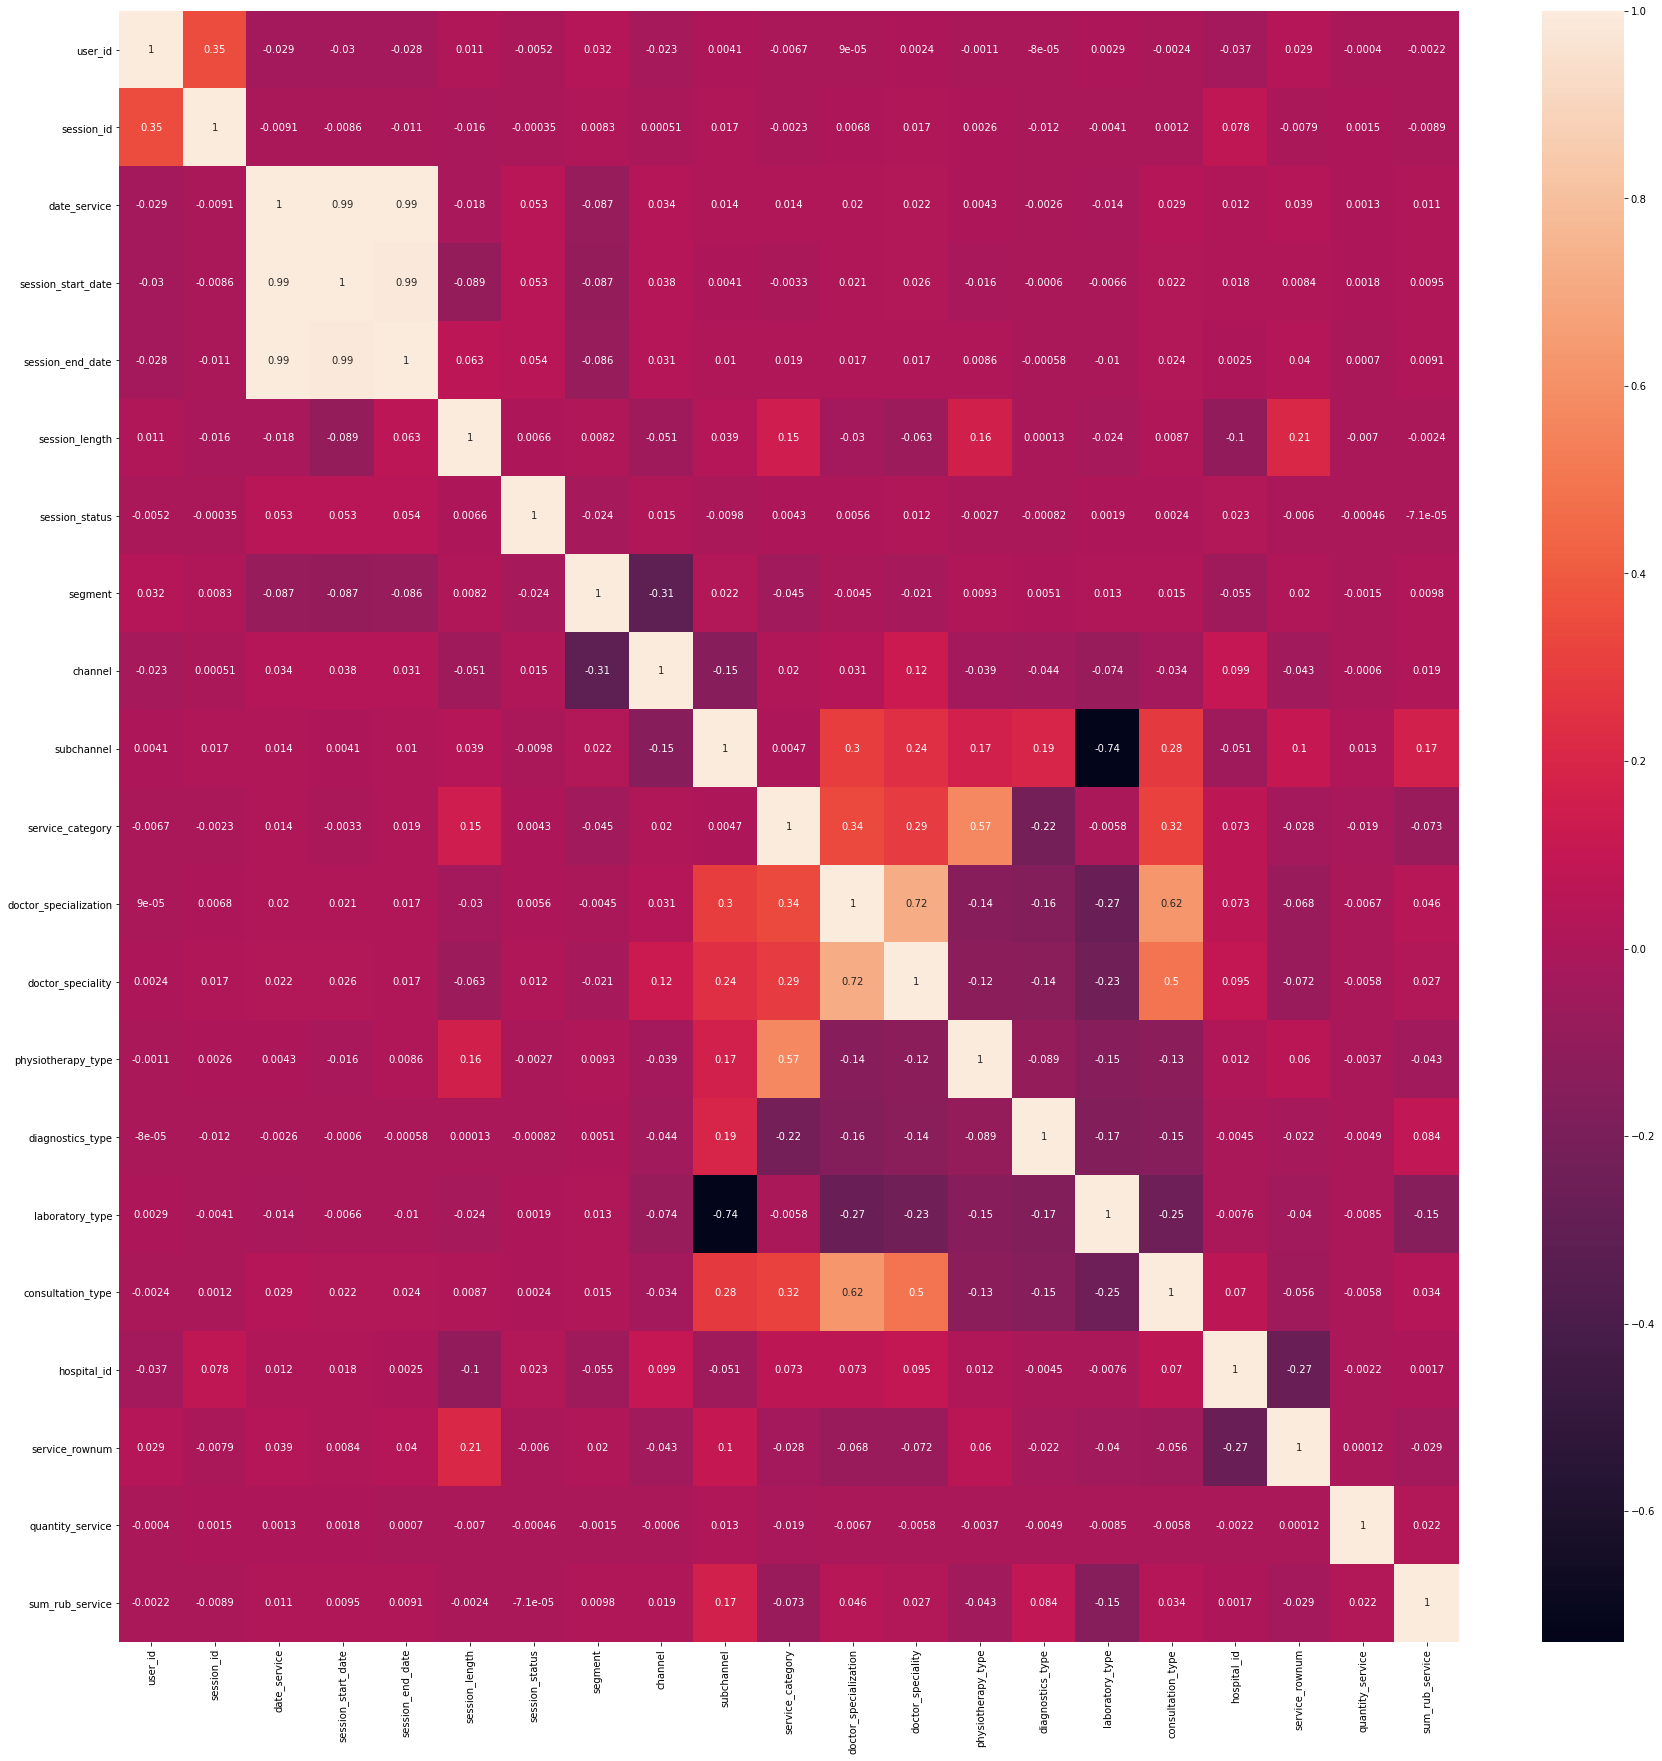

In [26]:
corr_matrix = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()


Из матрицы корреляции можно сказать о: 
* взаимоисключающей связи типа лабораторной диагностики и субканале оказании услуги
* взаимоисключающей связи типа лабораторной диагностики и специализации врача
* сильной связи специальности и специализации врача (естественно, хотя хорошо, что и данные подсветили)
* сильной связи типа консультации и специализации и специальности врача
* сильной связи начала и окончания сессии

In [27]:
# pairplot для всех числовых переменных
#sns.pairplot(data=data.select_dtypes(include=['int', 'float']))
#plt.show()

Кластеризирую по сумме оплаты за оказанные услуги в сессии. Делаю для того, чтобы явно указав две интересующие переменные, модель предположила разделение по кластерам итоговую сумму затрат за услуги

In [28]:
from sklearn.cluster import KMeans

# кластеризация объектов по столбцам 'quantity_service' и 'sum_rub_service'
kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data[['quantity_service', 'sum_rub_service']])



In [29]:
data['cluster'].describe()

count    999992.000000
mean          2.689330
std           0.909549
min           0.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: cluster, dtype: float64

<AxesSubplot:>

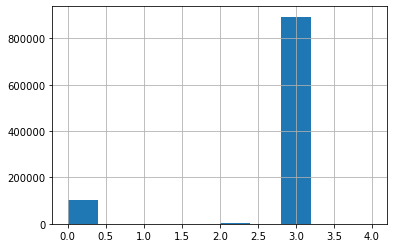

In [30]:
data['cluster'].hist()

Получаем 4 кластера разных сумм за оказанные услуги

In [31]:
# очень дорогие услуги
data.loc[data['cluster']==2]

,user_id,session_id,date_service,session_start_date,session_end_date,session_length,session_status,segment,channel,subchannel,...,doctor_speciality,physiotherapy_type,diagnostics_type,laboratory_type,consultation_type,hospital_id,service_rownum,quantity_service,sum_rub_service,cluster
712,100138436,99,125,117,166,50,0,1,0,4,...,0,0,2,0,0,141119963,10,1,13300,2
843,10044708,211,298,297,298,2,0,1,0,5,...,0,0,0,0,0,45022505,3,5,16847,2
2444,1016051,504,301,289,332,44,0,1,0,5,...,0,0,0,0,0,51,22,5,15116,2
2454,1016051,504,301,289,332,44,0,1,0,5,...,0,0,0,0,0,51,32,1,19378,2
2482,1016051,504,301,289,332,44,0,1,0,5,...,0,0,0,0,0,51,60,7,12814,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999791,142168881,96999,259,247,259,13,0,1,0,4,...,0,0,0,0,0,135163274,8,2,12703,2
999820,142172700,97158,83,52,88,37,0,1,0,5,...,0,0,0,0,0,143729455,40,1,20363,2
999937,142172707,97163,208,207,223,17,0,1,0,5,...,0,0,0,0,0,5000059,18,1,15932,2
999947,142172707,97163,218,207,223,17,0,1,0,5,...,0,0,0,0,0,5000059,28,5,11490,2


In [32]:
#дешевые услуги
data.loc[data['cluster']==0]

,user_id,session_id,date_service,session_start_date,session_end_date,session_length,session_status,segment,channel,subchannel,...,doctor_speciality,physiotherapy_type,diagnostics_type,laboratory_type,consultation_type,hospital_id,service_rownum,quantity_service,sum_rub_service,cluster
6,100134420,76,286,285,297,13,0,1,0,4,...,0,0,4,0,0,35002198,11,1,2239,0
12,100134420,76,297,285,297,13,0,1,0,4,...,0,0,4,0,0,35002198,19,1,3712,0
18,100134648,78,215,215,219,5,0,1,0,4,...,0,0,3,0,0,135347812,2,1,3001,0
19,100134648,78,219,215,219,5,0,1,0,4,...,0,0,1,0,0,143742988,3,1,3022,0
21,100134648,79,236,236,261,26,0,1,1,1,...,0,0,0,0,0,135347812,1,1,2964,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999989,142172786,97165,107,103,107,5,0,1,0,4,...,0,0,0,0,0,135163275,7,20,3146,0
999990,142172786,97165,107,103,107,5,0,1,0,4,...,0,0,0,0,0,135163275,8,15,3507,0
999992,142172786,97165,107,103,107,5,0,1,0,4,...,0,0,0,0,0,135163275,10,13,2511,0
999998,142172803,97167,91,87,125,39,0,1,0,4,...,0,0,2,0,0,141539497,3,1,4589,0


In [33]:
#средние услуги
data.loc[data['cluster']==3]

,user_id,session_id,date_service,session_start_date,session_end_date,session_length,session_status,segment,channel,subchannel,...,doctor_speciality,physiotherapy_type,diagnostics_type,laboratory_type,consultation_type,hospital_id,service_rownum,quantity_service,sum_rub_service,cluster
0,100134420,76,286,285,297,13,0,1,0,2,...,0,0,0,4,0,35002198,5,1,220,3
1,100134420,76,286,285,297,13,0,1,0,2,...,0,0,0,4,0,35002198,6,1,244,3
2,100134420,76,286,285,297,13,0,1,0,2,...,0,0,0,4,0,35002198,7,1,216,3
3,100134420,76,286,285,297,13,0,1,0,2,...,0,0,0,4,0,35002198,8,1,454,3
4,100134420,76,286,285,297,13,0,1,0,2,...,0,0,0,4,0,35002198,9,1,229,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,142172786,97165,107,103,107,5,0,1,0,4,...,0,0,0,0,0,135163275,11,14,2060,3
999994,142172803,97166,26,26,37,12,0,1,0,4,...,5,0,0,0,1,138293660,1,1,506,3
999995,142172803,97166,32,26,37,12,0,1,0,4,...,5,0,0,0,3,138293660,2,1,623,3
999996,142172803,97166,37,26,37,12,0,1,0,4,...,5,0,0,0,3,138293660,3,1,340,3


In [34]:
#дорогие услуги
data.loc[data['cluster']==4]

,user_id,session_id,date_service,session_start_date,session_end_date,session_length,session_status,segment,channel,subchannel,...,doctor_speciality,physiotherapy_type,diagnostics_type,laboratory_type,consultation_type,hospital_id,service_rownum,quantity_service,sum_rub_service,cluster
38888,135181537,4041,167,166,179,14,0,1,0,5,...,0,0,0,0,0,35000255,34,1,389543,4
39279,135181537,4042,216,198,219,22,0,1,0,5,...,0,0,0,0,0,35000255,20,1,428192,4
48914,1276060,3244,236,215,236,22,0,1,0,5,...,0,0,0,0,0,45006337,30,1,221729,4
74048,135846041,7906,74,59,80,22,0,1,0,5,...,0,0,0,0,0,45006337,52,7,446687,4
127775,136590380,12208,167,145,172,28,0,1,0,5,...,0,0,0,0,0,145078885,56,1,301638,4
621523,140953918,59823,146,142,173,32,0,1,0,5,...,0,0,0,0,0,29,145,1,300455,4
621596,140953918,59823,153,142,173,32,0,1,0,5,...,0,0,0,0,0,29,218,1,256039,4
729677,141234905,67421,270,261,270,10,0,1,0,5,...,0,0,0,0,0,45006337,174,9,361082,4
729678,141234905,67421,270,261,270,10,0,1,0,5,...,0,0,0,0,0,45006337,175,1,259359,4
983807,142135838,96103,409,380,413,34,0,1,0,4,...,0,0,0,0,0,135147306,35,1,288334,4


Статистический тест

In [35]:
data['channel'].unique()

array([0, 1, 2])

In [36]:
#правда ли что очные приемы и телемедицина имеют схожее распределение по затратам денег?

male_salaries = data.loc[data['channel'] == 'ТМ', 'sum_rub_service']
female_salaries = data.loc[data['channel'] == 'Очно', 'sum_rub_service']
ttest_ind(male_salaries, female_salaries)

#p-value маленькое, значит с высокой вероятностью различие в стоимости очного приема и телемедицины не случайно

Ttest_indResult(statistic=nan, pvalue=nan)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999992 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   user_id                999992 non-null  int64
 1   session_id             999992 non-null  int32
 2   date_service           999992 non-null  int32
 3   session_start_date     999992 non-null  int32
 4   session_end_date       999992 non-null  int32
 5   session_length         999992 non-null  int64
 6   session_status         999992 non-null  int32
 7   segment                999992 non-null  int32
 8   channel                999992 non-null  int32
 9   subchannel             999992 non-null  int32
 10  service_category       999992 non-null  int32
 11  doctor_specialization  999992 non-null  int32
 12  doctor_speciality      999992 non-null  int32
 13  physiotherapy_type     999992 non-null  int32
 14  diagnostics_type       999992 non-null  int32
 15  laboratory_type  

In [38]:
data.isnull().sum()

user_id                  0
session_id               0
date_service             0
session_start_date       0
session_end_date         0
session_length           0
session_status           0
segment                  0
channel                  0
subchannel               0
service_category         0
doctor_specialization    0
doctor_speciality        0
physiotherapy_type       0
diagnostics_type         0
laboratory_type          0
consultation_type        0
hospital_id              0
service_rownum           0
quantity_service         0
sum_rub_service          0
cluster                  0
dtype: int64

данные исследованы, пропуски заполнены, данные готовы к дальнейшей работе с ними

### 2 Определить, какие медицинские услуги, их последовательности, а также другие факторы могут оказать влияние на увеличение средней суммы оплаты за сессию и среднего количества услуг в сессии

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
#взять 1% случайных данных для поиска самых важных признаков, иначе не влезает в оперативную память
data_001 = data.sample(frac = 0.01)

In [41]:
data_001.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 736931 to 204739
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   user_id                10000 non-null  int64
 1   session_id             10000 non-null  int32
 2   date_service           10000 non-null  int32
 3   session_start_date     10000 non-null  int32
 4   session_end_date       10000 non-null  int32
 5   session_length         10000 non-null  int64
 6   session_status         10000 non-null  int32
 7   segment                10000 non-null  int32
 8   channel                10000 non-null  int32
 9   subchannel             10000 non-null  int32
 10  service_category       10000 non-null  int32
 11  doctor_specialization  10000 non-null  int32
 12  doctor_speciality      10000 non-null  int32
 13  physiotherapy_type     10000 non-null  int32
 14  diagnostics_type       10000 non-null  int32
 15  laboratory_type        10000 n

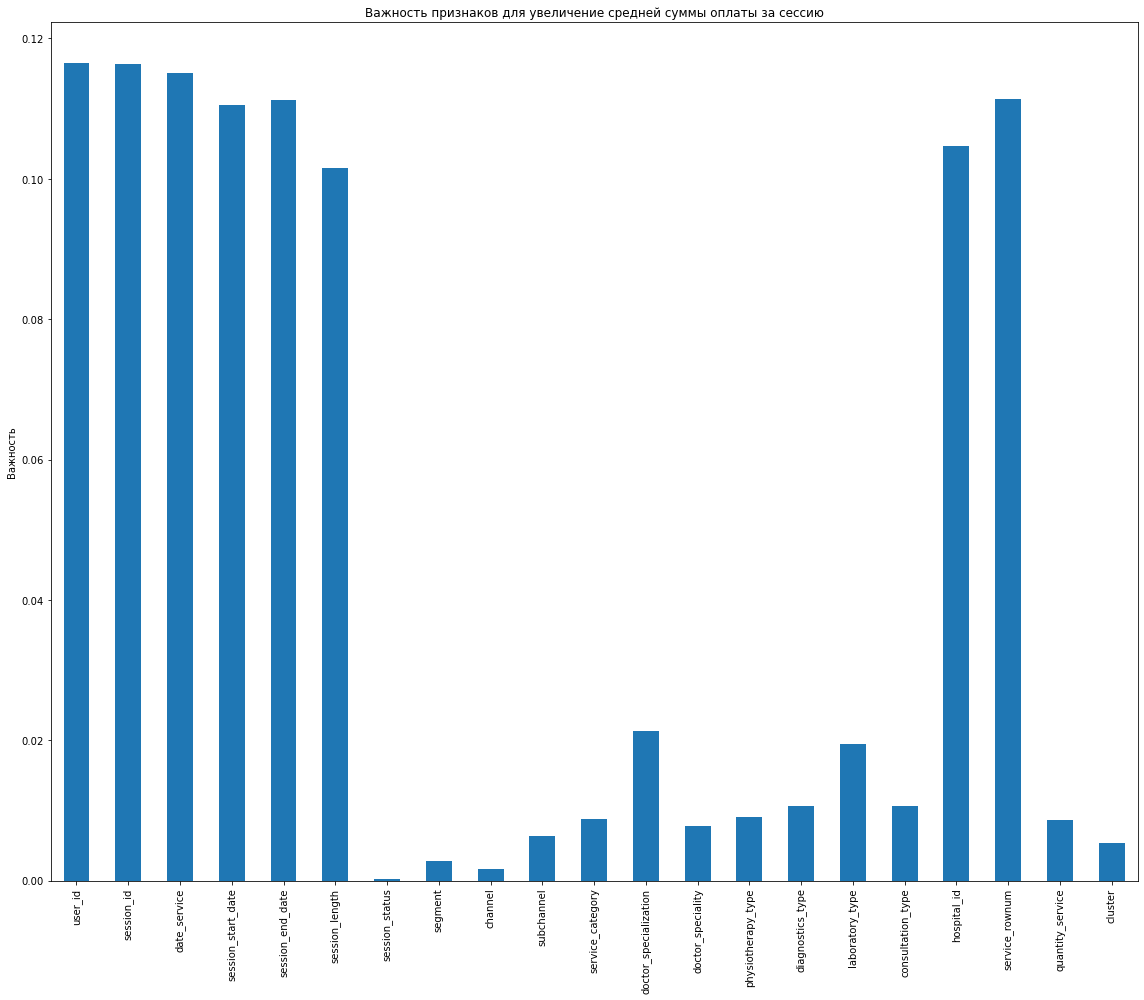

In [42]:
model_skl_iris = RandomForestClassifier()
model_skl_iris.fit(X = data_001.drop(['sum_rub_service'], axis=1),
                   y = data_001['sum_rub_service'])

skl_iris_imp = pd.Series(model_skl_iris.feature_importances_,
                         data_001.drop(['sum_rub_service'], axis=1).columns)

fig, ax = plt.subplots(figsize=(16,14))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков для увеличение средней суммы оплаты за сессию")
ax.set_ylabel('Важность')
fig.tight_layout()

Самое большое влияние оказывают признаки, которые изначально были количественными, затем из качественных это специализация врача и тип лабораторной диагностики. 

Это может быть как ошибка, допущенная при обработке качественных признаков(заполнении пропусков), так и закономерность данной предметной области(вдруг на итоговую сумму больше влияет больше дата обращения и кол-во сессий, чем кол-во услуг в сессии).

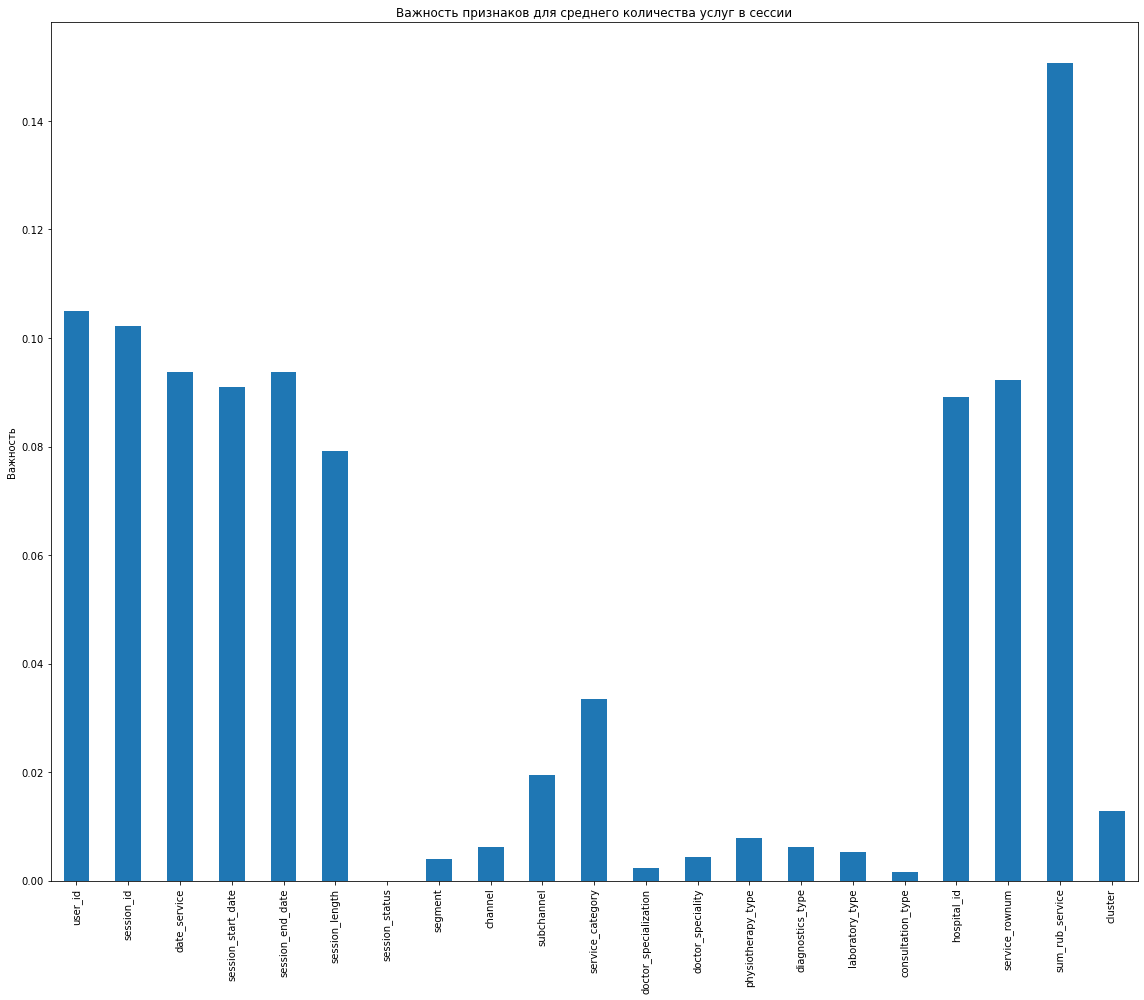

In [43]:
model_skl_iris = RandomForestClassifier()
model_skl_iris.fit(X = data_001.drop(['quantity_service'], axis=1),
                   y = data_001['quantity_service'])

skl_iris_imp = pd.Series(model_skl_iris.feature_importances_,
                         data_001.drop(['quantity_service'], axis=1).columns)

fig, ax = plt.subplots(figsize=(16,14))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков для среднего количества услуг в сессии")
ax.set_ylabel('Важность')
fig.tight_layout()

Здесь же самое большое влияние на кол-во услуг за сессию оказывает сумма оплаты за сессию, а также категория услуги, что логично, ведь может быть несколько последовательных услуг в одной категории(вылечить ноги это физиотерапия, операция, прием врача и тд, что является услугами). Опять же вопрос в корректности, потому что категориальные признаки подозрительно незначительно влияют на данную целевую переменную.

Так же интересна закономерность, что сумма не зависит от числа услуг в сессии, а вот кол-во услуг прямо зависит от итоговой стоимости. С этими данными не производилось никаких манипуляций, и в принципе это понятно, тк на цена скорее всего формируется за каждую услугу. Это нужно спросить у бизнеса

### 3.1 Разработать модель способную прогнозировать среднюю сумму оплаты за сессию

Обучение модели и подбор гиперпараметров

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import time
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import train_test_split

C:\Users\panao\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\panao\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\panao\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [45]:
# делю данные на тренировочную, валидационную и тестовую выборки
features = data.drop(['sum_rub_service'], axis = 1)  
target = data['sum_rub_service'] 

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=123)
features_valid, features_test, target_valid, target_test = train_test_split(features, target, test_size=0.5, random_state=123)

In [46]:
#проверка размерности 
features_train.shape[0], features_valid.shape[0], features_test.shape[0], target_train.shape[0], target_valid.shape[0], target_test.shape[0]

(599995, 499996, 499996, 599995, 499996, 499996)

In [47]:
#для подбора гиперпараметров с помощью GridSearchCV
data_category_columns = ['session_status', 'segment', 'channel', 'subchannel',
           'service_category', 'doctor_speciality', 'doctor_specialization', 'physiotherapy_type', 'diagnostics_type', 'laboratory_type', 'consultation_type']

In [48]:
#приведение категориальных столбцов к типу 'категория'
features_train['session_status'] = features_train['session_status'].astype('category')
features_train['segment'] = features_train['segment'].astype('category')
features_train['channel'] = features_train['channel'].astype('category')
features_train['subchannel'] = features_train['subchannel'].astype('category')
features_train['service_category'] = features_train['service_category'].astype('category')
features_train['doctor_speciality'] = features_train['doctor_speciality'].astype('category')
features_train['doctor_specialization'] = features_train['doctor_specialization'].astype('category')
features_train['physiotherapy_type'] = features_train['physiotherapy_type'].astype('category')
features_train['diagnostics_type'] = features_train['diagnostics_type'].astype('category')
features_train['laboratory_type'] = features_train['laboratory_type'].astype('category')
features_train['consultation_type'] = features_train['consultation_type'].astype('category')

features_valid['session_status'] = features_valid['session_status'].astype('category')
features_valid['segment'] = features_valid['segment'].astype('category')
features_valid['channel'] = features_valid['channel'].astype('category')
features_valid['subchannel'] = features_valid['subchannel'].astype('category')
features_valid['service_category'] = features_valid['service_category'].astype('category')
features_valid['doctor_speciality'] = features_valid['doctor_speciality'].astype('category')
features_valid['doctor_specialization'] = features_valid['doctor_specialization'].astype('category')
features_valid['physiotherapy_type'] = features_valid['physiotherapy_type'].astype('category')
features_valid['diagnostics_type'] = features_valid['diagnostics_type'].astype('category')
features_valid['laboratory_type'] = features_valid['laboratory_type'].astype('category')
features_valid['consultation_type'] = features_valid['consultation_type'].astype('category')

<ipython-input-48-aebfba82b12f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train['session_status'] = features_train['session_status'].astype('category')
<ipython-input-48-aebfba82b12f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train['segment'] = features_train['segment'].astype('category')
<ipython-input-48-aebfba82b12f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [49]:
#функция для подсчета времени обучения и предсказывания модели(с помощью нее потом сравню модели по эффективности)
def time_score(model, features_train, target_train, features_test, target_test):
    
    start = time.time()    
    model.fit(features_train, target_train)
    train_time = time.time() - start
    
    start = time.time()  
    predict = model.predict(features_test)
    predict_time = time.time() - start

    return train_time, predict_time, mean_squared_error(target_test, predict)**0.5

In [50]:
'''%%time
#подбор гиперпараметров
estim_new = lgb.LGBMRegressor(num_leaves= 31,learning_rate=0.01)

param_grid = {
    'n_estimators': [10,50,100,200,250],
    'max_depth': [1,5,10,15,20] 
}

cv = KFold(random_state=12345, shuffle=True, n_splits=7)
gbm = GridSearchCV(estim_new, param_grid, cv=cv, scoring='neg_mean_squared_error')

gbm.fit(features_train, target_train, categorical_feature=data_category_columns)

print('Best parameters is:', gbm.best_params_)
print('Best score is:', gbm.best_score_)
'''

"%%time\n#подбор гиперпараметров\nestim_new = lgb.LGBMRegressor(num_leaves= 31,learning_rate=0.01)\n\nparam_grid = {\n    'n_estimators': [10,50,100,200,250],\n    'max_depth': [1,5,10,15,20] \n}\n\ncv = KFold(random_state=12345, shuffle=True, n_splits=7)\ngbm = GridSearchCV(estim_new, param_grid, cv=cv, scoring='neg_mean_squared_error')\n\ngbm.fit(features_train, target_train, categorical_feature=data_category_columns)\n\nprint('Best parameters is:', gbm.best_params_)\nprint('Best score is:', gbm.best_score_)\n"

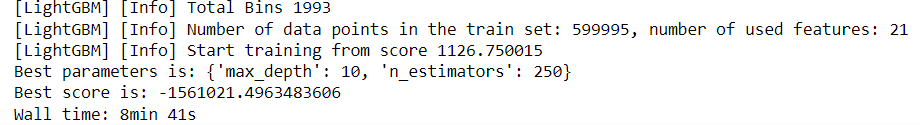

In [51]:
%%time
#обучение LGBMRegressor
model = lgb.LGBMRegressor(num_leaves= 31, learning_rate=0.01, max_depth=10, n_estimators=250)

model.fit(features_train, target_train, categorical_feature=data_category_columns)
predicted_valid1 = model.predict(features_valid)

rmse = (mean_squared_error(target_valid, predicted_valid1))**0.5

rmse

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 599995, number of used features: 21
[LightGBM] [Info] Start training from score 1126.750015
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Wall time: 8.29 s


1402.89821114787

In [52]:
#занесение результатов в сравнительную таблицу
result = []
result.append(time_score(model, features_train, target_train, features_valid, target_valid))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 599995, number of used features: 21
[LightGBM] [Info] Start training from score 1126.750015
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [53]:
%%time

#Обучим CatBoost:

model_cat = CatBoostRegressor(n_estimators = 200, loss_function = 'MAE', eval_metric = 'RMSE', cat_features = data_category_columns)

model_cat.fit(features_train, target_train, cat_features=data_category_columns, verbose=40)
predicted_valid2 = model_cat.predict(features_valid)

rmse = (mean_squared_error(target_valid, predicted_valid2))**0.5
rmse

0:	learn: 2439.0080490	total: 649ms	remaining: 2m 9s
40:	learn: 2159.7165129	total: 16s	remaining: 1m 2s
80:	learn: 2103.5183544	total: 30.6s	remaining: 45s
120:	learn: 2077.6893435	total: 48s	remaining: 31.4s
160:	learn: 1907.4105899	total: 1m 9s	remaining: 16.8s
199:	learn: 1863.3021240	total: 1m 29s	remaining: 0us
Wall time: 1min 30s


1900.5823691243281

In [54]:
result.append(time_score(model_cat, features_train, target_train, features_valid, target_valid))

0:	learn: 2439.0080490	total: 464ms	remaining: 1m 32s
1:	learn: 2425.2558238	total: 801ms	remaining: 1m 19s
2:	learn: 2412.3628841	total: 1.17s	remaining: 1m 16s
3:	learn: 2400.1189465	total: 1.67s	remaining: 1m 21s
4:	learn: 2388.1168765	total: 2.01s	remaining: 1m 18s
5:	learn: 2376.8619316	total: 2.56s	remaining: 1m 22s
6:	learn: 2366.1211386	total: 2.9s	remaining: 1m 19s
7:	learn: 2355.9240984	total: 3.25s	remaining: 1m 18s
8:	learn: 2346.5059362	total: 3.73s	remaining: 1m 19s
9:	learn: 2336.8548747	total: 4.15s	remaining: 1m 18s
10:	learn: 2327.9074116	total: 4.46s	remaining: 1m 16s
11:	learn: 2319.3536205	total: 4.88s	remaining: 1m 16s
12:	learn: 2311.1993477	total: 5.42s	remaining: 1m 18s
13:	learn: 2303.3569416	total: 5.92s	remaining: 1m 18s
14:	learn: 2295.7655393	total: 6.25s	remaining: 1m 17s
15:	learn: 2278.4404071	total: 6.74s	remaining: 1m 17s
16:	learn: 2271.6223760	total: 7.01s	remaining: 1m 15s
17:	learn: 2265.4236361	total: 7.42s	remaining: 1m 15s
18:	learn: 2259.37438

In [55]:
pd.DataFrame(data=result,
index=['LightGBM', 'CatBoost'],
columns=['Время_обучения', 'Время_Предсказания', 'RMSE'])

,Время_обучения,Время_Предсказания,RMSE
LightGBM,5.839843,2.291399,1402.898211
CatBoost,89.668234,0.418259,1900.582369


Сравнивая разные модели градиентного бустинга(не стал использовать другие линейные модели, тк бустинге круче всех не нейронных моделей), я считаю, что можно ограничиться LightGBM, тк RMSE(считает в руб итоговые затраты пациента) примерно один и тот же, а вот время обучения в десятки раз дольше

Возвращаясь к пункту 2, где была задача поиска взаимосвязанных признаков, то мы можем увидеть какие признаки больше всего оказывают влияния на решения в уже обученной модели LightGBM

In [56]:
# model is the trained model
importances = model.feature_importances_

# train_features is the dataframe of training features
feature_list = list(features_train.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,hospital_id,1384
1,quantity_service,1012
2,service_rownum,918
3,cluster,750
4,service_category,509
5,session_length,384
6,diagnostics_type,367
7,subchannel,348
8,user_id,307
9,laboratory_type,296


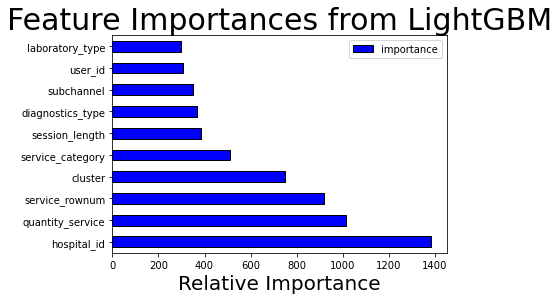

In [57]:

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from LightGBM', size = 30);

таким образом обученная LightGBM на задаче предсказывания стоимости услуг опирается на решении больше всего на:
* конкретной больнице, так как скорее всего цены на услуги везде разные
* на кол-во услуг в сессии, чем больше, тем дороже 
* порядковый номер услуги в рамках сессии (не знаю почему так из-за специфики проф среды)
* cluster это моя переменная, которая определяет к какому диапазону относится услуга(дешево, средне, дорого, очень дорого)
* на категорию услуги, что тоже понятно, ведь есть большая разница как проведена услуга, на каком оборудовании - от этого вопрос итоговой стоимости

Была навязчивая мысль почистить датасет от id-шников, потому что они не несут как такового смысла, но дают возможности модели "подогнаться" под данные, запомнить айдишники, ведь я не учитывал их при разбиении на test-train(один и тот же человек может оказаться в тестовой и обучающей выборке). Не стал это делать, тк по итогу модель больше всего зависит от идентификатора больницы, а этому есть логическое обоснование(у каждой больницы свой прайс лист за услуги)

Также бить на test-train возможно лучше по уникальным айдишникам, а то может получиться утечка данных, тоже как точка роста этого исследования

### 4.1 Тестирование модели способной прогнозировать среднюю сумму оплаты за сессию

In [58]:
features_test['session_status'] = features_test['session_status'].astype('category')
features_test['segment'] = features_test['segment'].astype('category')
features_test['channel'] = features_test['channel'].astype('category')
features_test['subchannel'] = features_test['subchannel'].astype('category')
features_test['service_category'] = features_test['service_category'].astype('category')
features_test['doctor_speciality'] = features_test['doctor_speciality'].astype('category')
features_test['doctor_specialization'] = features_test['doctor_specialization'].astype('category')
features_test['physiotherapy_type'] = features_test['physiotherapy_type'].astype('category')
features_test['diagnostics_type'] = features_test['diagnostics_type'].astype('category')
features_test['laboratory_type'] = features_test['laboratory_type'].astype('category')
features_test['consultation_type'] = features_test['consultation_type'].astype('category')

<ipython-input-58-134f48fe7126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test['session_status'] = features_test['session_status'].astype('category')
<ipython-input-58-134f48fe7126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test['segment'] = features_test['segment'].astype('category')
<ipython-input-58-134f48fe7126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [59]:
#просмотр rmse на тестовой выборке данных
predicted_valid1 = model.predict(features_test)

rmse = (mean_squared_error(target_test, predicted_valid1))**0.5

rmse

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


1247.9663237077025

In [60]:
#функция sMAPE
def smape(a, f):
    return 1/len(a) * np.sum(np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [61]:
print(f'Cимметричная средняя абсолютная процентная ошибка (smape) для этой модели составляет: {round(smape(target_test, predicted_valid1), 4)}%')

Cимметричная средняя абсолютная процентная ошибка (smape) для этой модели составляет: 24.394%


Возможно из-за приближения smape к нулю возросла ошибка 

<AxesSubplot:xlabel='sum_rub_service'>

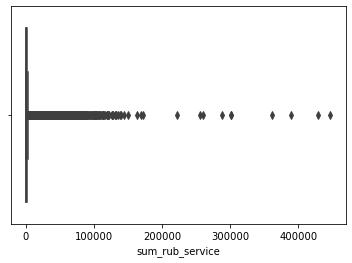

In [62]:
sns.boxplot(x=data['sum_rub_service'])

Предсказания модели похожи на правду, она определяет итоговую стоимость услуг, с помощью rmse видно в руб, а с помощью smape видно процент ошибки

### 3.2 Разработать модель, способную анализировать последовательность медицинских услуг в сессии 


Не получилось использовать цепи маркова, как и RNN для решения задачи последовательности. Мне не хватило времени, чтобы настроить и разобраться в новой для себя задаче. Лишний код удалил.

Для цепей маркова можно попробовать сделать текстовые цепочки типа "Completed	Не КМ	Очно	Лаборатория" и предсказывать следующий этап, используя два предыдущих. 

In [14]:
import markovify


In [409]:
data_mark

,user_id,session_id,date_service,session_start_date,session_end_date,session_length,session_status,segment,channel,subchannel,...,doctor_specialization,doctor_speciality,physiotherapy_type,diagnostics_type,laboratory_type,consultation_type,hospital_id,service_rownum,quantity_service,sum_rub_service
0,100134420,100134420.2.1,2022-10-14,2022-10-13,2022-10-25,13,Completed,Не КМ,Очно,Лаборатория,...,NaN,NaN,NaN,NaN,Лаб. усл. - биохим.,NaN,35002198,5,1,220
1,100134420,100134420.2.1,2022-10-14,2022-10-13,2022-10-25,13,Completed,Не КМ,Очно,Лаборатория,...,NaN,NaN,NaN,NaN,Лаб. усл. - биохим.,NaN,35002198,6,1,244
2,100134420,100134420.2.1,2022-10-14,2022-10-13,2022-10-25,13,Completed,Не КМ,Очно,Лаборатория,...,NaN,NaN,NaN,NaN,Лаб. усл. - биохим.,NaN,35002198,7,1,216
3,100134420,100134420.2.1,2022-10-14,2022-10-13,2022-10-25,13,Completed,Не КМ,Очно,Лаборатория,...,NaN,NaN,NaN,NaN,Лаб. усл. - биохим.,NaN,35002198,8,1,454
4,100134420,100134420.2.1,2022-10-14,2022-10-13,2022-10-25,13,Completed,Не КМ,Очно,Лаборатория,...,NaN,NaN,NaN,NaN,Лаб. усл. - биохим.,NaN,35002198,9,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,142172803,142172803.1.1,2022-02-02,2022-01-27,2022-02-07,12,Completed,Не КМ,Очно,Поликлиника,...,Терапевт,Терапевт,NaN,NaN,NaN,Повторный,138293660,2,1,623
999996,142172803,142172803.1.1,2022-02-07,2022-01-27,2022-02-07,12,Completed,Не КМ,Очно,Поликлиника,...,Терапевт,Терапевт,NaN,NaN,NaN,Повторный,138293660,3,1,340
999997,142172803,142172803.2.1,2022-03-30,2022-03-29,2022-05-06,39,Completed,Не КМ,Очно,Поликлиника,...,NaN,NaN,NaN,Эндоскопия,NaN,NaN,138546454,2,1,1566
999998,142172803,142172803.2.1,2022-04-02,2022-03-29,2022-05-06,39,Completed,Не КМ,Очно,Поликлиника,...,NaN,NaN,NaN,МРТ,NaN,NaN,141539497,3,1,4589


In [ ]:
data_mark

In [15]:
# создание объекта Text из текстовых данных
text = "The quick brown fox jumps over the lazy dog. The lazy dog jumps over the quick brown fox."

# создание модели цепей Маркова на основе обучающих данных
model = markovify.Text(text)

# создание словаря цепей Маркова на основе обучающих данных
chain_dict = model.chain.to_json()

# предсказание следующей категории на основе предыдущих категорий
next_category_prob = model.chain.move(('fox', 'jumps'))
print(next_category_prob)

over


In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Преобразование категориальных переменных в числовые значения
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_mark)

# Разбиение данных на обучающую и тестовую выборки
train_data, test_data = train_test_split(encoded_data, test_size=0.2)

# Определение архитектуры RNN
model = Sequential()
model.add(LSTM(128, input_shape=(train_data.shape[1], 1)))
model.add(Dense(encoded_data.shape[1], activation='softmax'))

# Обучение модели
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(train_data, epochs=10)

# Оценка производительности модели на тестовой выборке
score = model.evaluate(test_data)

# Прогнозирование последовательности категориальных переменных
predicted_data = model.predict(test_data)

AttributeError: module 'numpy' has no attribute 'typeDict'

In [11]:
 !pip show numpy

Name: numpy
Version: 1.21.0
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: c:\users\panao\anaconda3\lib\site-packages
Requires: 
Required-by: transformers, torchvision, tifffile, thinc, tensorflow-intel, tensorboard, tables, statsmodels, spacy, sentence-transformers, seaborn, scipy, scikit-learn, scikit-image, PyWavelets, patsy, pandas, opt-einsum, numexpr, numba, mkl-random, mkl-fft, matplotlib, lightgbm, imageio, h5py, gensim, catboost, Bottleneck, bokeh, blis, bkcharts, astropy
